In [5]:
import data_api as api
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
time_start = "2019-03-07 14:30:00"
time_end = "2019-03-08 14:40:00"

In [24]:
data_stage = api.get_data(channels=['SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS'],
                    start=time_start, 
                    end=time_end)
data_pressure = api.get_data(channels=['SLAAR01-LI2C01_CH1:PRES'],
                    start=time_start, 
                    end=time_end)

[INFO] Querying channels: ['SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS']
[INFO] Querying on globalDate between 2019-03-07 14:30:00 and 2019-03-08 14:40:00


In [49]:
Stage_pos_y = data_stage[['SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS']].values
Stage_pos_x = data_stage[['globalSeconds']].values

Pressure_y = data_pressure[['SLAAR01-LI2C01_CH1:PRES']].values
Pressure_x = data_pressure[['globalSeconds']].values

In [64]:
data_temp = api.get_data(channels=['SLAAR01-LI2C01_CH1:TEMP'],
                    start=time_start, 
                    end=time_end)

[INFO] Querying channels: ['SLAAR01-LI2C01_CH1:TEMP']
[INFO] Querying on globalDate between 2019-03-07 14:30:00 and 2019-03-08 14:40:00


In [67]:
Temp_y = data_temp[['SLAAR01-LI2C01_CH1:TEMP']].values
Temp_x = data_temp[['globalSeconds']].values

In [75]:
df = pd.DataFrame(Temp_y)
Temp_rolling = df.rolling(100).mean()

<IPython.core.display.Javascript object>


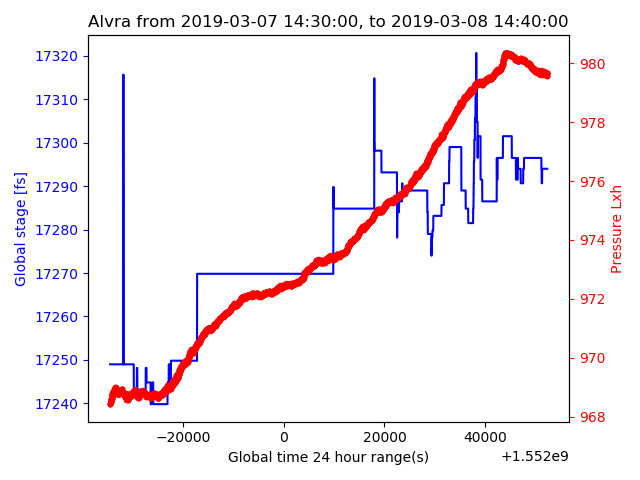

In [61]:
fig, ax1 = plt.subplots()
plt.title('Alvra from %s, to %s'%(time_start,time_end))
ax1.plot(Stage_pos_x, Stage_pos_y*666.66,'b-')
ax1.set_xlabel('Global time 24 hour range(s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Global stage [fs]', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(Pressure_x, Pressure_y, 'r.')
ax2.set_ylabel('Pressure Lxh', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


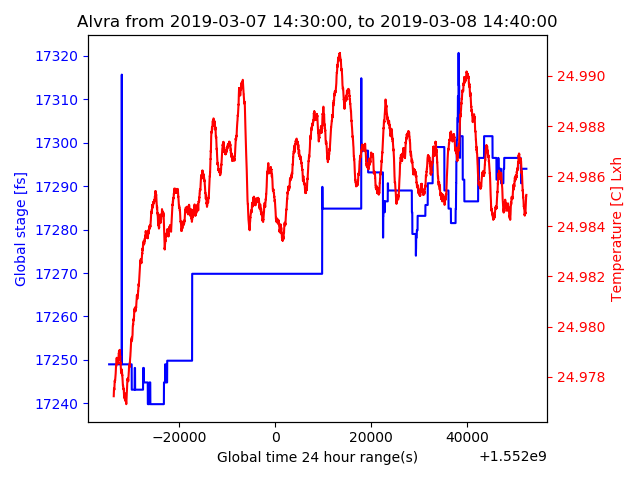

In [76]:
fig, ax1 = plt.subplots()
plt.title('Alvra from %s, to %s'%(time_start,time_end))
ax1.plot(Stage_pos_x, Stage_pos_y*666.66,'b-')
ax1.set_xlabel('Global time 24 hour range(s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Global stage [fs]', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(Temp_x, Temp_rolling, 'r')
ax2.set_ylabel('Temperature [C] Lxh', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()
